<a href="https://colab.research.google.com/github/muddassirali8089/AASFS/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')  # ✅ This is the correct mount path

# Now import pandas and read your dataset
import pandas as pd

# ✅ Make sure the file path is correct (case-sensitive!)
data = pd.read_csv('/content/drive/MyDrive/DataSets/customer_churn_dataset-training-master.csv')
test_Data = pd.read_csv('/content/drive/MyDrive/DataSets/customer_churn_dataset-testing-master.csv')





Mounted at /content/drive


In [4]:
data.head()

# Drop rows with missing values (only 1 row)
data_cleaned = data.dropna()

# Drop the 'CustomerID' column (first column)
data_cleaned = data_cleaned.drop('CustomerID', axis=1)

# Verify changes
print("Cleaned Data Shape:", data_cleaned.shape)
data_cleaned.head()
data_cleaned.info()

Cleaned Data Shape: (440832, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 40.4+ MB


In [5]:
# Step 1: Drop missing values (if any)

data.dropna(inplace=True)
test_Data.dropna(inplace=True)

# Step 2: Remove 'CustomerID' column
data.drop('CustomerID', axis=1, inplace=True)
test_Data.drop('CustomerID', axis=1, inplace=True)

# Verify changes
data.info()
test_Data.info()




<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 40.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 

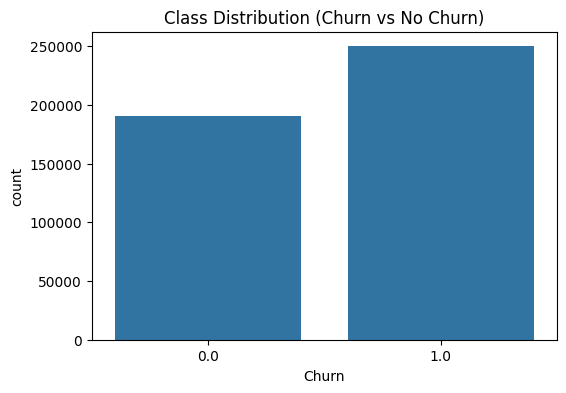

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Class Distribution (Churn vs No Churn)')
plt.show()

# Print counts
print(data['Churn'].value_counts())


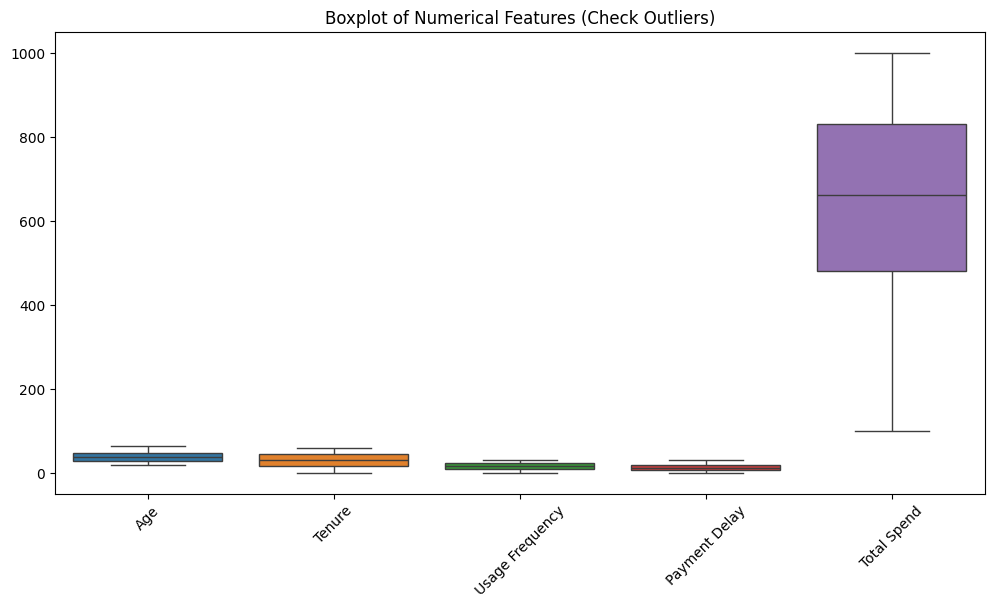

In [7]:
numerical_cols = ['Age', 'Tenure', 'Usage Frequency', 'Payment Delay', 'Total Spend']
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_cols])
plt.title('Boxplot of Numerical Features (Check Outliers)')
plt.xticks(rotation=45)
plt.show()



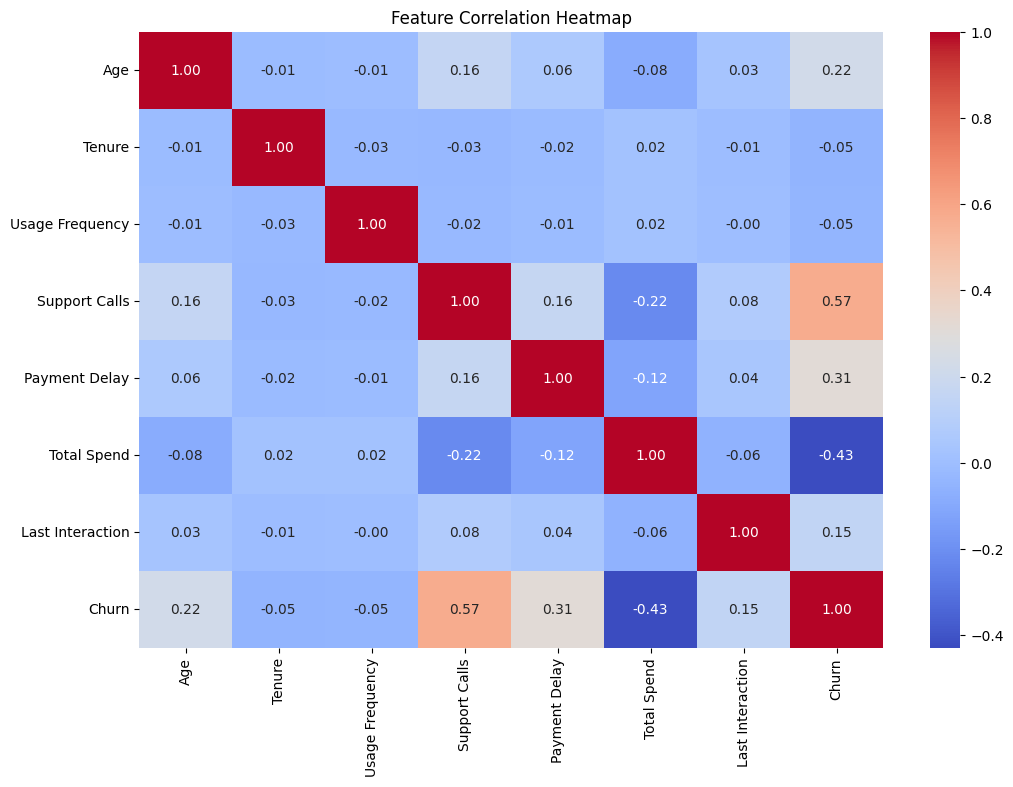

In [8]:
# Calculate correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

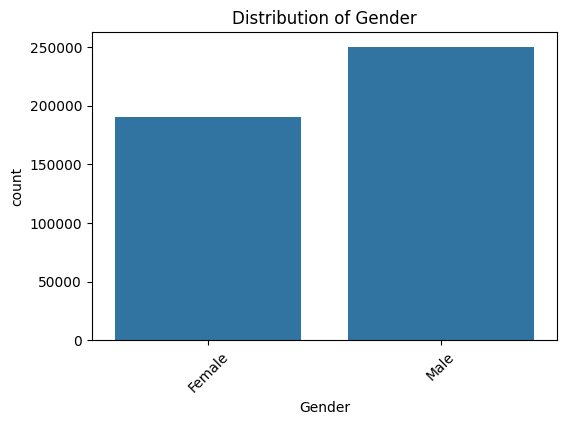

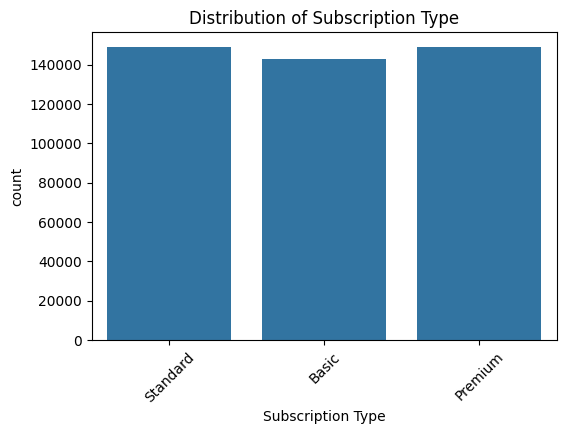

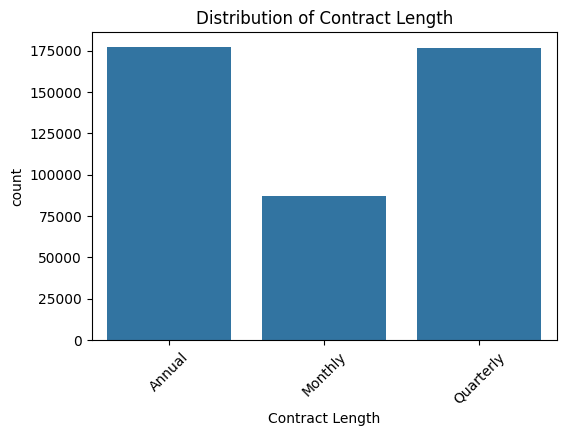

In [9]:
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


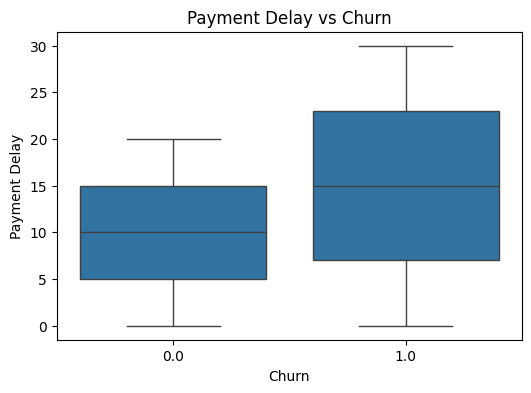

In [12]:
# Example: Payment Delay vs Churn
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='Payment Delay', data=data)
plt.title('Payment Delay vs Churn')
plt.show()

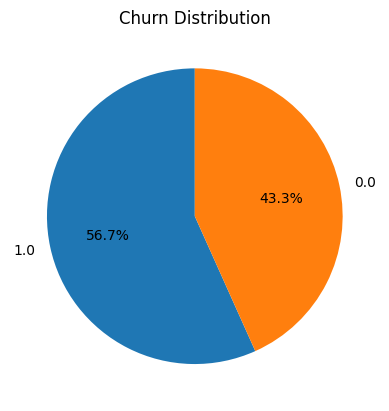

In [11]:
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Churn Distribution")
plt.ylabel("")
plt.show()


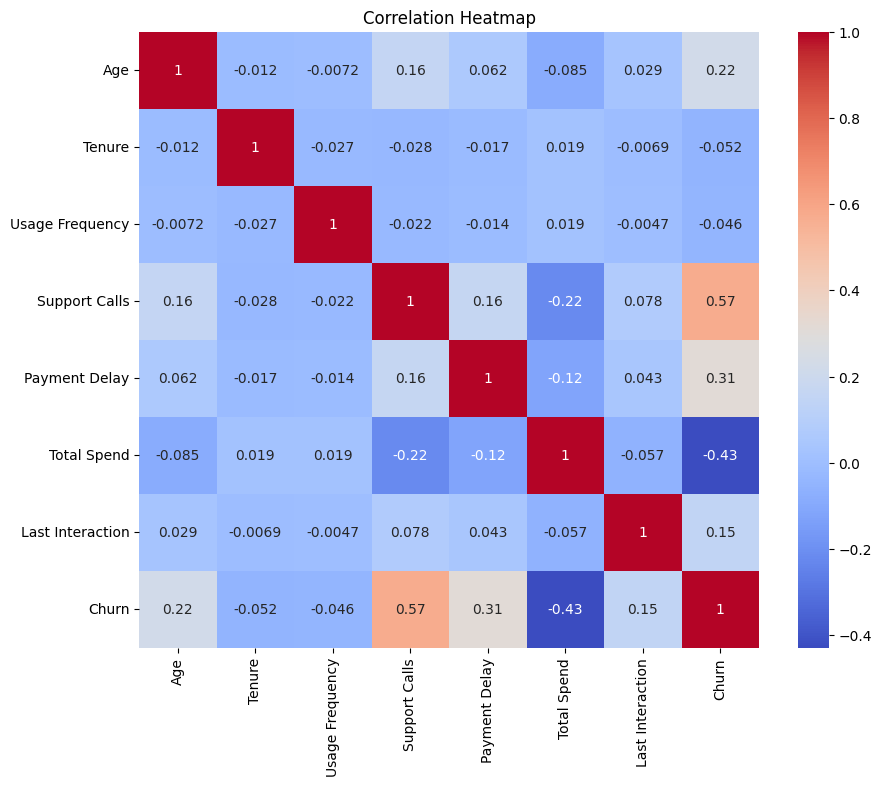

In [ ]:
# Use only numeric columns for correlation
corr = data.select_dtypes(include=['number']).corr()

# Now plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



In [ ]:
sns.pairplot(data[['Age', 'Total Spend', 'Churn']], hue='Churn')
plt.show()


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode Gender
data['Gender'] = le.fit_transform(data['Gender'])
test_Data['Gender'] = le.transform(test_Data['Gender'])

# Encode Subscription Type
data['Subscription Type'] = le.fit_transform(data['Subscription Type'])
test_Data['Subscription Type'] = le.transform(test_Data['Subscription Type'])

# Encode Contract Length
data['Contract Length'] = le.fit_transform(data['Contract Length'])
test_Data['Contract Length'] = le.transform(test_Data['Contract Length'])

In [23]:
# Training data
X_train = data.drop('Churn', axis=1)  # Features
y_train = data['Churn']               # Target (0 or 1)

# Test data
X_test = test_Data.drop('Churn', axis=1)
y_test = test_Data['Churn']


In [24]:
from sklearn.tree import DecisionTreeClassifier

# Initialize model with class weighting
model = DecisionTreeClassifier(
    class_weight='balanced',  # Penalizes misclassification of minority class
    random_state=42          # For reproducibility
)
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [28]:
from sklearn.metrics import classification_report, accuracy_score

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.5033398577065274

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.73      0.53      0.38     64374
weighted avg       0.75      0.50      0.37     64374

